# 4.8 RNN
시계열 데이터를 RNN으로 분석 
* RNN 기초
* 입력데이터의 구조

![feature 1](https://cl.ly/123144b5d040/Image%2525202019-10-26%252520at%25252010.46.55%252520AM.png)
![target](https://cl.ly/bc7ff5524afc/Image%2525202019-10-26%252520at%25252011.15.19%252520AM.png)
![feature 2](https://cl.ly/897eb457c826/Image%2525202019-10-26%252520at%25252010.55.56%252520AM.png)


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

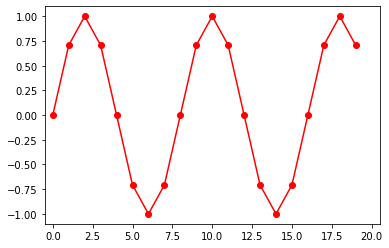

In [4]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [5]:
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01])

In [6]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [7]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [8]:
X_train

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]],

       [[ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00]],

       [[-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01]],

       [[-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16]],

       [[-7.07106781e-01],
        [-2.44929360e-16],
        [ 7.07106781e-01]],

       [[-2.44929360e-16],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 3.67394040e-16]],

       [[ 7.07106781e-01],
        [ 3.67394040e-16],
        [-7.07106781e-01]],

    

In [9]:
Y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  0.00000000e+00])

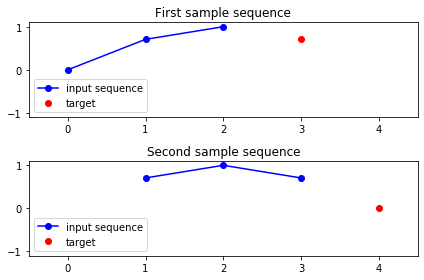

In [10]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [12]:
# 뉴런 갯수 10
model = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(10,input_shape=(3,1)),
  tf.keras.layers.Dense(1, activation='linear')
])

In [13]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

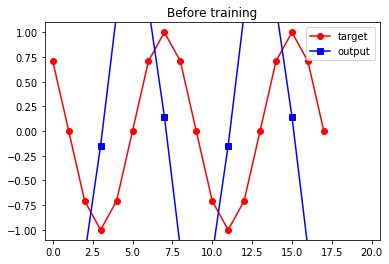

In [14]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [15]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

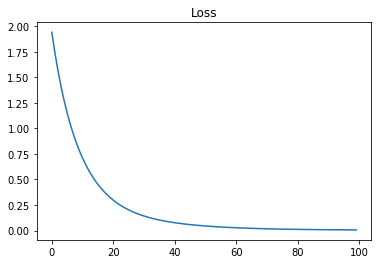

In [16]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

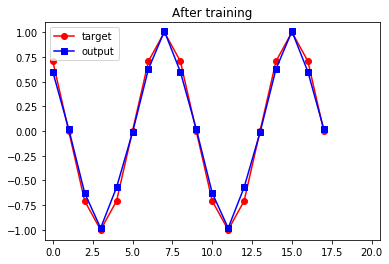

In [17]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [29]:

# 뉴런 갯수 10
# 입력 - 3차원 batch_size, timesteps, output_features
# 출력
# return_sequences 인수를 True로 하면 
# 출력 순서열 중 마지막 값만 출력하는 것이 아니라 전체 순서열을 3차원(axis) 텐서 형태로 출력
# 3차원: batch_size, timesteps, output_features
# 2차원: batch_size, output_features
# TimeDistributed wrapper를 사용하여 3차원 텐서 입력을 받을 수 있게 확장

model2 = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(10, return_sequences=True, input_shape=(3, 1)),
  #tf.keras.layers.SimpleRNN(10, return_sequences=True),    
  #tf.keras.layers.SimpleRNN(10, return_sequences=True),       
  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation="linear")) 
])

#model2.summary()

model2.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [30]:
X_train2 = S[:-3, 0:3][:, :, np.newaxis]
Y_train2 = S[:-3, 3:6][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((16, 3, 1), (16, 3, 1))

In [31]:
X_train2[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [32]:
Y_train2[:4]

array([[[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]],

       [[ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00]],

       [[-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01]],

       [[-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16]]])

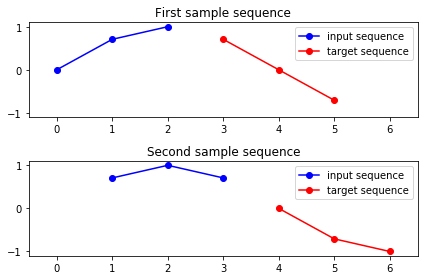

In [33]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train2[0].flatten(), 'bo-', label="input sequence")
plt.plot([3, 4, 5], Y_train2[0].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [34]:
history2 = model2.fit(X_train2, Y_train2, epochs=100, verbose=0)

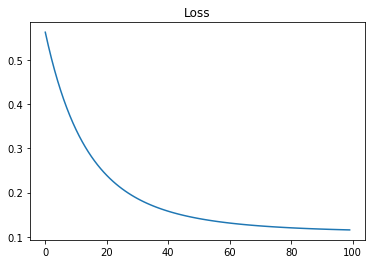

In [35]:
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.show()

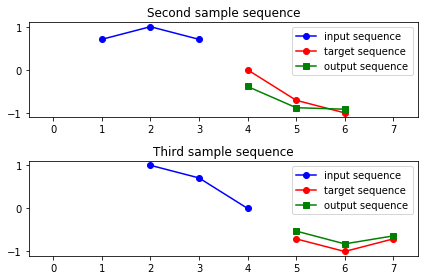

In [36]:
plt.subplot(211)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.plot([4, 5, 6], model2.predict(X_train2[1:2, :, :]
                                   ).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.subplot(212)
plt.plot([2, 3, 4], X_train2[2].flatten(), 'bo-', label="input sequence")
plt.plot([5, 6, 7], Y_train2[2].flatten(), 'ro-', label="target sequence")
plt.plot([5, 6, 7], model2.predict(X_train2[2:3, :, :]
                                   ).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Third sample sequence")
plt.tight_layout()
plt.show()